<a href="https://colab.research.google.com/github/MUbarak123-56/qiskit-work/blob/master/qml/pegasos_qsvc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install -q qiskit
!pip install -q pylatexenc
#!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
!pip install -q qiskit-aer
!pip install -q qiskit-machine-learning

In [2]:
from sklearn.datasets import make_blobs

# example dataset
features, labels = make_blobs(n_samples=20, n_features=2, centers=2, random_state=3, shuffle=True)

In [3]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

features = MinMaxScaler(feature_range=(0, np.pi)).fit_transform(features)

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=15, shuffle=False
)

In [4]:
# number of qubits is equal to the number of features
num_qubits = 2

# number of steps performed during the training procedure
tau = 100

# regularization parameter
C = 1000

In [5]:
from qiskit import BasicAer
from qiskit.circuit.library import ZFeatureMap
from qiskit.utils import algorithm_globals

from qiskit_machine_learning.kernels import FidelityQuantumKernel

algorithm_globals.random_seed = 12345

feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=1)

qkernel = FidelityQuantumKernel(feature_map=feature_map)

In [6]:
from qiskit_machine_learning.algorithms import PegasosQSVC

pegasos_qsvc = PegasosQSVC(quantum_kernel=qkernel, C=C, num_steps=tau)

# training
pegasos_qsvc.fit(train_features, train_labels)

# testing
pegasos_score = pegasos_qsvc.score(test_features, test_labels)
print(f"PegasosQSVC classification test score: {pegasos_score}")

PegasosQSVC classification test score: 1.0


In [7]:
grid_step = 0.2
margin = 0.2
grid_x, grid_y = np.meshgrid(
    np.arange(-margin, np.pi + margin, grid_step), np.arange(-margin, np.pi + margin, grid_step)
)

In [8]:
meshgrid_features = np.column_stack((grid_x.ravel(), grid_y.ravel()))
meshgrid_colors = pegasos_qsvc.predict(meshgrid_features)

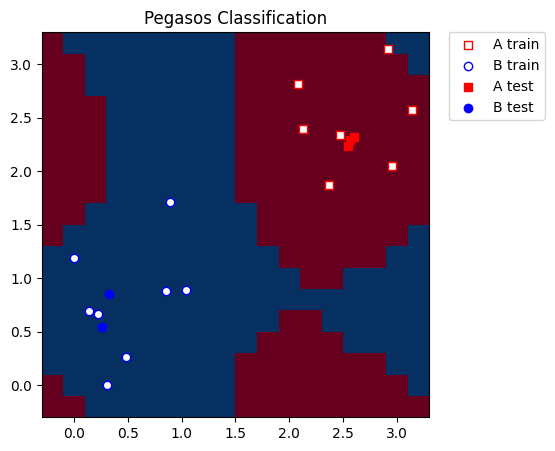

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
meshgrid_colors = meshgrid_colors.reshape(grid_x.shape)
plt.pcolormesh(grid_x, grid_y, meshgrid_colors, cmap="RdBu", shading="auto")

plt.scatter(
    train_features[:, 0][train_labels == 0],
    train_features[:, 1][train_labels == 0],
    marker="s",
    facecolors="w",
    edgecolors="r",
    label="A train",
)
plt.scatter(
    train_features[:, 0][train_labels == 1],
    train_features[:, 1][train_labels == 1],
    marker="o",
    facecolors="w",
    edgecolors="b",
    label="B train",
)

plt.scatter(
    test_features[:, 0][test_labels == 0],
    test_features[:, 1][test_labels == 0],
    marker="s",
    facecolors="r",
    edgecolors="r",
    label="A test",
)
plt.scatter(
    test_features[:, 0][test_labels == 1],
    test_features[:, 1][test_labels == 1],
    marker="o",
    facecolors="b",
    edgecolors="b",
    label="B test",
)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.title("Pegasos Classification")
plt.show()

In [10]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import qiskit
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
wine = load_wine()

In [12]:
features = wine.data
target = wine.target

In [13]:
wine_df = pd.DataFrame(features, columns=wine.feature_names)
wine_df["label"] = target

In [14]:
wine_df = wine_df[wine_df['label'] != 2]

In [15]:
train, test = train_test_split(wine_df, test_size=0.2, random_state=42)

In [17]:
min_max = MinMaxScaler()

In [18]:
train_scaled = min_max.fit_transform(train[wine.feature_names])

In [19]:
min_max.fit(train[wine.feature_names])
test_scaled = min_max.transform(test[wine.feature_names])

In [20]:
x_train = train_scaled
x_test = test_scaled
y_train = train["label"]
y_test = test["label"]

In [21]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.8)

In [23]:
x_train_new = pca.fit_transform(x_train)
pca.fit(x_train)
x_test_new = pca.transform(x_test)

In [24]:
import seaborn as sns; sns.set_style("darkgrid")

In [30]:
from qiskit_machine_learning.algorithms import PegasosQSVC
import time
algorithm_globals.random_seed = 12345

feature_map = ZFeatureMap(feature_dimension=5, reps=1)

qkernel = FidelityQuantumKernel(feature_map=feature_map)
pegasos_qsvc = PegasosQSVC(quantum_kernel=qkernel, C=100, num_steps=tau)
start = time.time()
pegasos_qsvc.fit(x_train_new, y_train)
elapsed = time.time() - start
# training
print("Time elapsed:", elapsed)

Time elapsed: 5.798340320587158


In [31]:
# testing
pegasos_train_score = pegasos_qsvc.score(x_train_new, y_train)
print(f"PegasosQSVC classification test score: {pegasos_train_score}")
pegasos_score = pegasos_qsvc.score(x_test_new, y_test)
print(f"PegasosQSVC classification test score: {pegasos_score}")

PegasosQSVC classification test score: 0.9807692307692307
PegasosQSVC classification test score: 1.0


In [32]:
pred_pegaqsvc = pegasos_qsvc.predict(x_test_new)

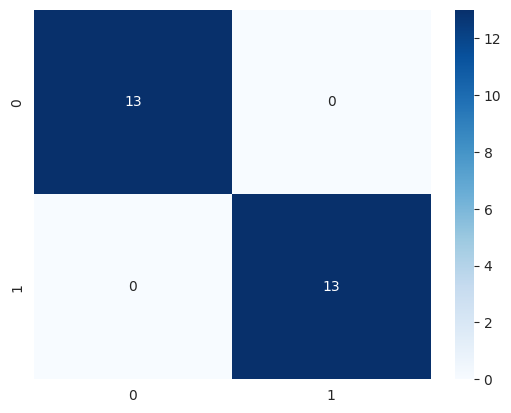

In [33]:
qsvc_conf = confusion_matrix(y_test, pred_pegaqsvc)
sns.heatmap(qsvc_conf, annot=True, fmt="d", cmap = "Blues")
plt.show();

In [34]:
print("Classification Report for QSVC")
print(classification_report(y_test, pred_pegaqsvc))

Classification Report for QSVC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



In [35]:
# Initialize QSVC algorithm
import time
from qiskit_machine_learning.algorithms.classifiers import QSVC
qsvc = QSVC(quantum_kernel=qkernel)

# clear objective value history
#objective_func_vals = []

start = time.time()
qsvc.fit(x_train_new, y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

Training time: 19 seconds


In [36]:
train_score_q4 = qsvc.score(x_train_new, y_train)
test_score_q4 = qsvc.score(x_test_new, y_test)

print(f"Quantum QSVC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum QSVC on the test dataset:     {test_score_q4:.2f}")

Quantum QSVC on the training dataset: 1.00
Quantum QSVC on the test dataset:     1.00


In [37]:
pred_qsvc = qsvc.predict(x_test_new)

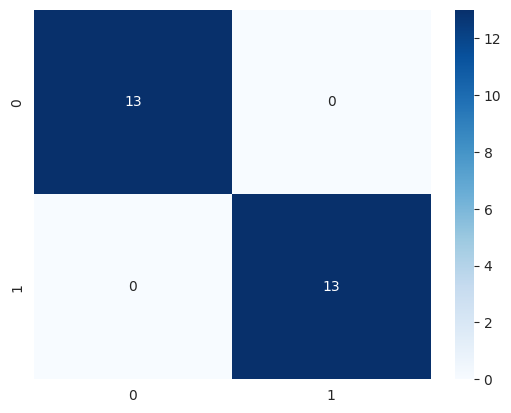

In [38]:
qsvc_conf = confusion_matrix(y_test, pred_qsvc)
sns.heatmap(qsvc_conf, annot=True, fmt="d", cmap = "Blues")
plt.show();

In [39]:
print("Classification Report for QSVC")
print(classification_report(y_test, pred_qsvc))

Classification Report for QSVC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

